Modified Code

NEON Site Options:

ABBY, BART, BLAN, CPER, DCFS, DSNY, GRSM, HARV, JERC, JORN, KONZ, MOAB, NOGP, OAES, ORNL, OSBS, SCBI, SERC, SOAP, SRER, STEI, TALL, TREE, UKFS, UNDE, WOOD

In [2]:
#Change the 4-character NEON site below.
neon_site= "TALL"

import os
os.environ['site'] = neon_site

import xarray as xr

In [3]:
original_path = '../inputdata/lnd/clm2/surfdata_map/NEON/surfdata_1x1_NEON_BART_hist_78pfts_CMIP6_simyr2000_c230111-original.nc'

In [4]:
pwd

'/home/user/experiments'

In [5]:
ls /home/user/inputdata/lnd/clm2/surfdata_map/NEON/surfdata_1x1_NEON_BART_hist_78pfts_CMIP6_simyr2000_c230111-original.nc

/home/user/inputdata/lnd/clm2/surfdata_map/NEON/surfdata_1x1_NEON_BART_hist_78pfts_CMIP6_simyr2000_c230111-original.nc


In [6]:
ds_surf_orig = xr.open_dataset(original_path)

In [7]:
ds_mod = ds_surf_orig.copy()

In [8]:
temp = ds_mod.PCT_NAT_PFT.values

In [9]:
temp[13] = temp[7]
temp[7] = temp[7] - temp[7]

In [10]:
ds_mod.PCT_NAT_PFT.values = temp

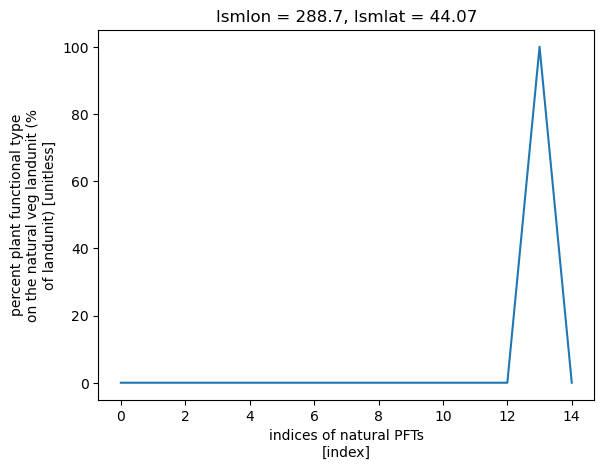

In [11]:
ds_mod.PCT_NAT_PFT.plot()

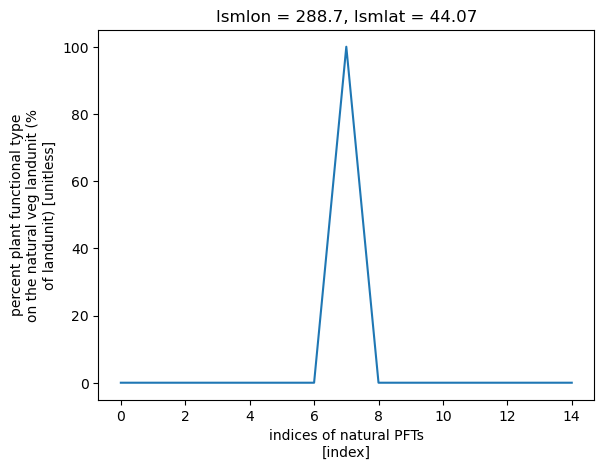

In [12]:
ds_surf_orig.PCT_NAT_PFT.plot()

In [13]:
ds_mod.to_netcdf('../inputdata/lnd/clm2/surfdata_map/NEON/surfdata_1x1_NEON_BART_hist_78pfts_CMIP6_simyr2000_c230111.nc')
ds_mod.to_netcdf('../inputdata/lnd/clm2/surfdata_map/NEON/surfdata_1x1_NEON_BART_hist_78pfts_CMIP6_simyr2000_c230111_grass.nc')


Take all the original simulation stuff out and put in new simulation to give different run neon commands and then run two separate runs with grass and original to create a side by side comparison

In [2]:
run_neon --neon-sites $site --output-root ~/CLM-NEON

/opt/ncar/cesm/tools/site_and_regional/run_neon.py:535: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if run_type is not "transient":
---- building a base case -------
ERROR: Existing base case is a historical type and should not be  -- rerun with the --orverwrite option


In [3]:
!ls $HOME/archive/$site.transient/lnd/hist/*2018*.nc |head -20

/home/user/archive/TALL.transient/lnd/hist/TALL.transient.clm2.h0.2018-01.nc
/home/user/archive/TALL.transient/lnd/hist/TALL.transient.clm2.h0.2018-02.nc
/home/user/archive/TALL.transient/lnd/hist/TALL.transient.clm2.h0.2018-03.nc
/home/user/archive/TALL.transient/lnd/hist/TALL.transient.clm2.h0.2018-04.nc
/home/user/archive/TALL.transient/lnd/hist/TALL.transient.clm2.h0.2018-05.nc
/home/user/archive/TALL.transient/lnd/hist/TALL.transient.clm2.h0.2018-06.nc
/home/user/archive/TALL.transient/lnd/hist/TALL.transient.clm2.h0.2018-07.nc
/home/user/archive/TALL.transient/lnd/hist/TALL.transient.clm2.h0.2018-08.nc
/home/user/archive/TALL.transient/lnd/hist/TALL.transient.clm2.h0.2018-09.nc
/home/user/archive/TALL.transient/lnd/hist/TALL.transient.clm2.h0.2018-10.nc
/home/user/archive/TALL.transient/lnd/hist/TALL.transient.clm2.h0.2018-11.nc
/home/user/archive/TALL.transient/lnd/hist/TALL.transient.clm2.h0.2018-12.nc
/home/user/archive/TALL.transient/lnd/hist/TALL.transient.clm2.h1.2018-01-01

All Simulation files: [ 365 files]


100%|██████████| 365/365 [00:21<00:00, 16.75it/s]


Reading all simulation files [ 365 files] took: 32.31858968734741 s.
Making this plot took  32.4554500579834 s.


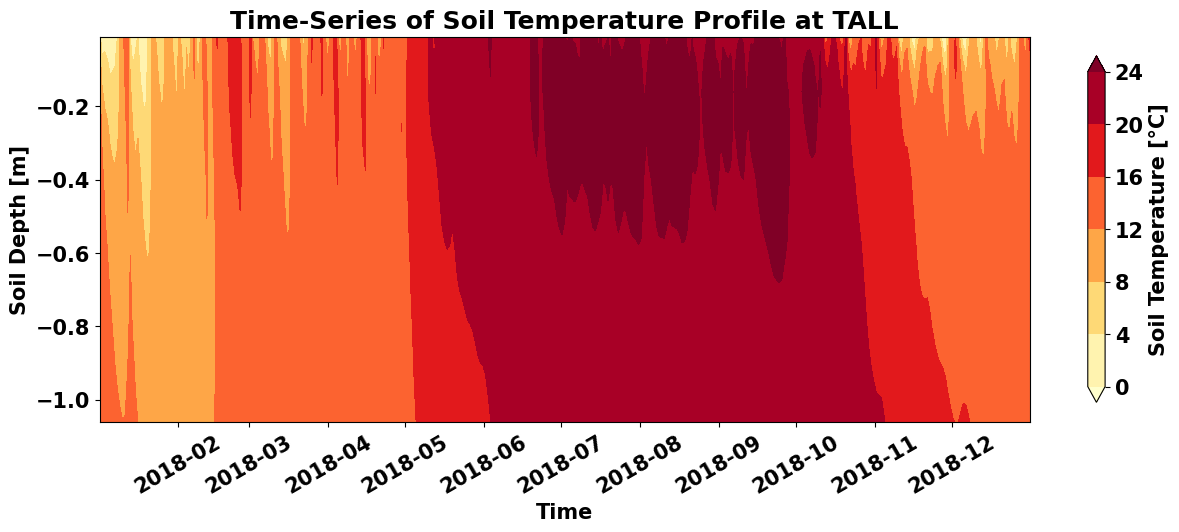

In [4]:
from neon_utils import plot_soil_profile_timeseries
sim_path = "/home/user/archive/"+neon_site+".transient/lnd/hist/"
case_name = neon_site+".transient.clm2"
year = 2018

plot_soil_profile_timeseries(sim_path, neon_site, case_name, 'TSOI', year)

In [ ]:
sim_path = "/home/user/archive/"+neon_site+".transient/lnd/hist/"
case_name = neon_site+".transient.clm2"
year = 2018

plot_soil_profile_timeseries(sim_path, neon_site, case_name, 'H2OSOI', year)

In [ ]:
#Change the 4-character NEON site below to point to your NEON site:
#neon_site = "ABBY"
neon_site = "TALL"

In [ ]:
!ls ~/archive/{neon_site}.transient/lnd/hist/*2018*.nc |head -20

In [ ]:
#Import Libraries
%matplotlib inline

import os
import sys
import time
import datetime

import numpy as np
import pandas as pd
import xarray as xr

from glob import glob
from os.path import join, expanduser

import matplotlib
import matplotlib.pyplot as plt

from scipy import stats

from neon_utils import download_eval_files

In [ ]:
#Specify the year below
year = "2018"

In [ ]:
sim_path = "/home/user/archive/"+neon_site+".transient/lnd/hist/"
sim_files = sorted(glob(join(sim_path,neon_site+".transient.clm2.h1."+year+"*.nc")))

print("All Simulation files: [", len(sim_files), "files]")

In [ ]:
start = time.time()

ds_ctsm = xr.open_mfdataset(sim_files, decode_times=True, combine='by_coords')

end = time.time()
print("Reading all simulation files took:", end-start, "seconds.")

In [ ]:
ds_ctsm

In [ ]:
ds_ctsm['GPP'].plot()

In [ ]:
eval_dir = "/home/user/evaluation_files/"

download_eval_files(neon_site, eval_dir, year)

In [ ]:
eval_path = os.path.join('/home/user/evaluation_files/',neon_site)

eval_files = sorted(glob(join(eval_path,neon_site+"_eval_"+year+"*.nc")))

print("All Observation files:")
print(*eval_files,sep='\n')

In [ ]:
start = time.time()

ds_eval = xr.open_mfdataset(eval_files, decode_times=True, combine='by_coords')

end = time.time()
print("Reading all observation files took:", end-start, "s.")

In [ ]:
#Convert CTSM data to a Pandas Dataframe for easier handling:
ctsm_vars = ['FCEV', 'FCTR', 'FGEV']

df_ctsm = pd.DataFrame({'time':ds_ctsm.time})

for var in ctsm_vars:
    field = np.ravel ( ds_ctsm[var])     
    df_ctsm[var]=field


#Convert NEON data to a Pandas Dataframe for easier handling:
eval_vars = ['EFLX_LH_TOT']

df_eval = pd.DataFrame({'time':ds_eval.time})

for var in eval_vars:
    field = np.ravel ( ds_eval[var])     
    df_eval[var]=field

#-- make df_all that includes both obs and sim
df_all = df_eval

#-- add simulation data to df_all and adjust for offset time dimension:
for var in ctsm_vars:
    sim_var_name = "sim_"+var
    #-- shift simulation data by one
    df_all[sim_var_name]=df_ctsm[var].shift(-1).values

In [ ]:
df_all.head()

In [ ]:
clm_var = 'sim_EFLX_LH_TOT'

#EFLX_LH_TOT = FCEV + FCTR +FGEV
df_all [clm_var] = df_all['sim_FCEV'] \
                 + df_all['sim_FCTR']\
                 + df_all['sim_FGEV']

df_all.head()

In [ ]:
csv_dir = "/home/user/preprocessed_data/"

#create the directory if it does not exist:
if not os.path.isdir(csv_dir):
    os.mkdir(csv_dir)

csv_out = os.path.join(csv_dir, "preprocessed_"+neon_site+"_"+year+".csv")
df_all.to_csv(csv_out,index=False)

In [ ]:
#-- extract year, month, day, hour information from time
df_all['year'] = df_all['time'].dt.year
df_all['month'] = df_all['time'].dt.month
df_all['day'] = df_all['time'].dt.day
df_all['hour'] = df_all['time'].dt.hour

In [ ]:
df_daily = df_all.groupby(['year','month','day']).mean().reset_index()
df_daily['time']=pd.to_datetime(df_daily[["year", "month", "day"]])

In [ ]:
plot_var = 'EFLX_LH_TOT'
sim_var = 'sim_'+plot_var

plot_var_desc = "Latent Heat Flux"
plot_var_unit= "W m$^{-2}$"

plt.figure(num=None, figsize=(13, 5),  facecolor='w', edgecolor='k')
        
ax = plt.gca()
df_daily.plot ( x= 'time', y = plot_var , marker = 'o' ,ax =ax , color = 'b',label="NEON")
df_daily.plot ( x= 'time', y = 'sim_'+plot_var , marker = 'o' ,ax =ax , color = 'r',label="CLM")

plt.xlabel('Time', fontsize=17)
plt.ylabel(plot_var_desc+" ["+plot_var_unit+"]", fontsize=17)
plt.title(year+" "+neon_site, fontweight='bold',fontsize=17)
plt.show()

In [ ]:
df_daily_std = df_all.groupby(['year','month','day']).std().reset_index()
df_daily_std['time'] = pd.to_datetime(df_daily_std[["year", "month", "day"]])

plt.figure(num=None, figsize=(13, 5),  facecolor='w', edgecolor='k')

plt.plot ( df_daily.time, df_daily[plot_var], marker = 'o' , color = 'b',label="NEON")
plt.plot ( df_daily.time, df_daily[sim_var], marker = 'o' , color = 'r',label="CLM")

plt.fill_between(df_daily.time, df_daily[plot_var]-df_daily_std[plot_var], df_daily[plot_var]+df_daily_std[plot_var] ,alpha=0.1, color = 'b')
plt.fill_between(df_daily.time, df_daily[sim_var]-df_daily_std[sim_var], df_daily[sim_var]+df_daily_std[sim_var] ,alpha=0.1, color = 'r')

plt.legend()
plt.xlabel('Time', fontsize=17)
plt.ylabel(plot_var_desc+" ["+plot_var_unit+"]", fontsize=17)
plt.title(year+" "+neon_site, fontweight='bold',fontsize=17)
plt.show()

In [ ]:
df_monthly = df_all.groupby(['year','month']).mean().reset_index()
df_monthly["day"]=15
df_monthly['time']=pd.to_datetime(df_monthly[["year", "month","day"]])

In [ ]:
def line_format(label):
    """
    Helper function to convert time label to the format of pandas line plot
    """
    month = label.month_name()[:3]
    if month == 'Jan':
        month += f'\n{label.year}'
    return month


plt.figure(num=None, figsize=(13, 5),  facecolor='w', edgecolor='k')
        
ax = plt.gca()

df_monthly.plot ( x= 'time', y = 'EFLX_LH_TOT' , marker = 'o' ,ax =ax , color = 'black',label="NEON Latent Heat Flux",use_index=False)
df_monthly[['time','sim_FCEV','sim_FCTR','sim_FGEV']].plot.bar ( x= 'time',stacked='True',ax=ax,rot=0)

ax.set_xticklabels(map(line_format, df_monthly.time))

#set labels for the legend
ax.legend(["NEON Latent Heat Flux", "Canopy Evaporation", "Canopy Transpiration", "Ground Evaporation"]);

plt.xlabel('Time')
plt.ylabel(plot_var_desc+" ["+plot_var_unit+"]")
        
plt.title(year+" "+neon_site, fontweight='bold')
plt.show()

In [ ]:
#-- calculate the percentage of total latent heat flux
df_monthly ['sim_FCEV_perc']= df_monthly ['sim_FCEV']/(df_monthly ['sim_FCEV']+df_monthly ['sim_FCTR']+df_monthly ['sim_FGEV'])*100
df_monthly ['sim_FCTR_perc']= df_monthly ['sim_FCTR']/(df_monthly ['sim_FCEV']+df_monthly ['sim_FCTR']+df_monthly ['sim_FGEV'])*100
df_monthly ['sim_FGEV_perc']= df_monthly ['sim_FGEV']/(df_monthly ['sim_FCEV']+df_monthly ['sim_FCTR']+df_monthly ['sim_FGEV'])*100

plt.figure(num=None, figsize=(13, 7),  facecolor='w', edgecolor='k')
        
ax = plt.gca()

df_monthly[['time','sim_FCEV_perc','sim_FCTR_perc','sim_FGEV_perc']].plot.bar ( x= 'time',stacked='True',ax=ax,rot=0)

ax.set_xticklabels(map(line_format, df_monthly.time))
ax.set_ylabel('% Components Latent Heat Flux', fontsize=16)
ax.legend(bbox_to_anchor=(1.04,0), loc="lower left",labels=["% Canopy Evaporation","% Canopy Transpiration","% Ground Evaporation"])
ax2 = ax.twinx()
df_monthly.plot ( x= 'time', y = 'sim_EFLX_LH_TOT' , marker = 'o' ,ax =ax2 , color = 'b',label="CLM Latent Heat",use_index=False)
df_monthly.plot ( x= 'time', y = 'EFLX_LH_TOT' , marker = 'o' ,ax =ax2 , color = 'r',label="NEON Latent Heat",use_index=False)

plt.ylabel(plot_var_desc+" ["+plot_var_unit+"]")
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

plt.title(year+" "+neon_site, fontweight='bold')
plt.show()

In [ ]:
#Defining generic function for scatter plots
def detailed_scatter (x, y, color):
    plt.scatter (x,y, marker="o",color = color)
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    line = slope*x+intercept
    plt.plot(x,line,'black', label='y={:.2f}x+{:.2f}'.format(slope,intercept)+" (R2="+"{:.2f}".format(r_value)+")")
    plt.legend(fontsize=13)

In [ ]:
#Generating plots
plt.figure(num=None, figsize=(15, 5),  facecolor='w', edgecolor='k')

plt.subplot(1, 3, 1)
detailed_scatter (df_daily.sim_FCEV, df_daily.sim_EFLX_LH_TOT, '#1f77b4')
plt.ylabel('Latent Heat [Wm-2]')
plt.xlabel('Canopy Evaporation [Wm-2]')

plt.subplot(1, 3, 2)
detailed_scatter (df_daily.sim_FCTR, df_daily.sim_EFLX_LH_TOT, '#ff7f0e')

plt.ylabel('Latent Heat [Wm-2]')
plt.xlabel('Canopy Transpiration [Wm-2]')

plt.subplot(1, 3, 3)
detailed_scatter (df_daily.sim_FGEV, df_daily.sim_EFLX_LH_TOT,'#2ca02c')

plt.ylabel('Latent Heat [Wm-2]')
plt.xlabel('Ground Evaporation [Wm-2]')

plt.suptitle(year+" "+neon_site+" Scatter Plots", fontweight='bold')

plt.tight_layout()
plt.show()

In [ ]:
df_daily['season'] = ((df_daily['month']%12+3)//3).map({1:'DJF', 2: 'MAM', 3:'JJA', 4:'SON'})

fig= plt.figure(num=None, figsize=(18,12),  facecolor='w', edgecolor='k')

season = 'MAM'
df_season =  df_daily[df_daily['season']==season]

plt.subplot(3, 4, 1)
detailed_scatter (df_season.sim_FCEV, df_season.sim_EFLX_LH_TOT, '#1f77b4')
plt.title(season, fontweight='bold')
plt.ylabel('Latent Heat [Wm-2]')
plt.xlabel('Canopy Evaporation [Wm-2]')

plt.subplot(3, 4, 5)
detailed_scatter (df_season.sim_FCTR, df_season.sim_EFLX_LH_TOT, '#ff7f0e')
plt.ylabel('Latent Heat [Wm-2]')
plt.xlabel('Canopy Transpiration [Wm-2]')


plt.subplot(3, 4, 9)
detailed_scatter (df_season.sim_FGEV, df_season.sim_EFLX_LH_TOT,'#2ca02c')
plt.ylabel('Latent Heat [Wm-2]')
plt.xlabel('Ground Evaporation [Wm-2]')


season = 'JJA'
df_season =  df_daily[df_daily['season']==season]

plt.subplot(3, 4, 2)
detailed_scatter (df_season.sim_FCEV, df_season.sim_EFLX_LH_TOT, '#1f77b4')
plt.title(season, fontweight='bold')
plt.ylabel('Latent Heat [Wm-2]')
plt.xlabel('Canopy Evaporation [Wm-2]')

plt.subplot(3, 4, 6)
detailed_scatter (df_season.sim_FCTR, df_season.sim_EFLX_LH_TOT, '#ff7f0e')
plt.ylabel('Latent Heat [Wm-2]')
plt.xlabel('Canopy Transpiration [Wm-2]')

plt.subplot(3, 4, 10)
detailed_scatter (df_season.sim_FGEV, df_season.sim_EFLX_LH_TOT,'#2ca02c')
plt.ylabel('Latent Heat [Wm-2]')
plt.xlabel('Ground Evaporation [Wm-2]')


season = 'SON'
df_season =  df_daily[df_daily['season']==season]

plt.subplot(3, 4, 3)
detailed_scatter (df_season.sim_FCEV, df_season.sim_EFLX_LH_TOT, '#1f77b4')
plt.title(season, fontweight='bold')
plt.ylabel('Latent Heat [Wm-2]')
plt.xlabel('Canopy Evaporation [Wm-2]')

plt.subplot(3, 4, 7)
detailed_scatter (df_season.sim_FCTR, df_season.sim_EFLX_LH_TOT, '#ff7f0e')
plt.ylabel('Latent Heat[Wm-2]')
plt.xlabel('Canopy Transpiration [Wm-2]')

plt.subplot(3, 4, 11)
detailed_scatter (df_season.sim_FGEV, df_season.sim_EFLX_LH_TOT,'#2ca02c')
plt.ylabel('Latent Heat [Wm-2]')
plt.xlabel('Ground Evaporation [Wm-2]')

season = 'DJF'
df_season =  df_daily[df_daily['season']==season]

plt.subplot(3, 4, 4)
detailed_scatter (df_season.sim_FCEV, df_season.sim_EFLX_LH_TOT, '#1f77b4')
plt.title(season, fontweight='bold')
plt.ylabel('Latent Heat [Wm-2]')
plt.xlabel('Canopy Evaporation [Wm-2]')

plt.subplot(3, 4, 8)
detailed_scatter (df_season.sim_FCTR, df_season.sim_EFLX_LH_TOT, '#ff7f0e')
plt.ylabel('Latent Heat [Wm-2]')
plt.xlabel('Canopy Transpiration [Wm-2]')

plt.subplot(3, 4, 12)
detailed_scatter (df_season.sim_FGEV, df_season.sim_EFLX_LH_TOT, '#2ca02c')
plt.ylabel('Latent Heat [Wm-2]')
plt.xlabel('Ground Evaporation [Wm-2]')

fig.suptitle(year+" "+neon_site+ " Seasonal Scatter Plots", fontweight='bold')
fig.tight_layout()

plt.show()

In [ ]:
tzone_shift = ds_eval.TimeDiffUtcLt
#convert to local time
df_all['local_time']= df_all['time'] + datetime.timedelta(hours=int(tzone_shift))

df_all['local_hour'] = df_all['local_time'].dt.hour

In [ ]:
# Calculate annual average diel cycle and bias
diel_df_mean = df_all.groupby('local_hour').mean().reset_index()
diel_df_std = df_all.groupby('local_hour').std().reset_index()

diel_df_mean['EFLX_LH_TOT_bias'] = diel_df_mean['sim_EFLX_LH_TOT']- diel_df_mean['EFLX_LH_TOT']
diel_df_mean.head()

In [ ]:
# Plot annual average diel cycle and bias
plt.figure(num=None, figsize=(13, 9),  facecolor='w', edgecolor='k')
        
plt.subplot(2, 1, 1)  
        
plt.plot ( diel_df_mean.local_hour, diel_df_mean[plot_var], marker = 'o' , color = 'b',label="NEON")
plt.plot ( diel_df_mean.local_hour, diel_df_mean[sim_var], marker = 'o' , color = 'r',label="CLM")

plt.fill_between(diel_df_mean.local_hour, diel_df_mean[plot_var]-diel_df_std[plot_var], diel_df_mean[plot_var]+diel_df_std[plot_var] ,alpha=0.1, color = 'b')
plt.fill_between(diel_df_mean.local_hour, diel_df_mean[sim_var]-diel_df_std[sim_var], diel_df_mean[sim_var]+diel_df_std[sim_var] ,alpha=0.1, color = 'r')
plt.ylabel('Latent Heat Flux [Wm-2]', fontsize=16)
plt.axvline(x=12, color = 'gray',linestyle='dashed',alpha=0.75)

plt.title("Diurnal Cycle of Latent Heat Flux "+neon_site+" "+year, fontweight='bold')
plt.legend()
plt.subplot(4, 1, 3)  

ax = plt.gca()    
diel_df_mean.plot ( x= 'local_hour', y = 'EFLX_LH_TOT_bias' , marker = 'o' ,ax =ax , color = 'black',label='Bias')
plt.xlabel('Hour', fontsize=16)
plt.ylabel('Bias', fontsize=16)
plt.axvline(x=12, color = 'gray',linestyle='dashed',alpha=0.75)

plt.show()

In [ ]:
#Calculating diel cycle flux proportions
diel_df_mean['sim_FCEV_perc']= diel_df_mean ['sim_FCEV']/(diel_df_mean ['sim_FCEV']+diel_df_mean ['sim_FCTR']+diel_df_mean ['sim_FGEV'])*100
diel_df_mean ['sim_FCTR_perc']= diel_df_mean ['sim_FCTR']/(diel_df_mean ['sim_FCEV']+diel_df_mean ['sim_FCTR']+diel_df_mean ['sim_FGEV'])*100
diel_df_mean ['sim_FGEV_perc']= diel_df_mean ['sim_FGEV']/(diel_df_mean ['sim_FCEV']+diel_df_mean ['sim_FCTR']+diel_df_mean ['sim_FGEV'])*100

In [ ]:
#plotting diel cycl flux proportions
from matplotlib import gridspec

fig= plt.figure(num=None, figsize=(13, 10),  facecolor='w', edgecolor='k')

gs = gridspec.GridSpec(3, 1, height_ratios=[3, 1, 2]) 

ax0 = plt.subplot(gs[0])
        
ax0.plot ( diel_df_mean.local_hour, diel_df_mean['EFLX_LH_TOT'], marker = 'o' , color = 'b',label="NEON")
ax0.plot ( diel_df_mean.local_hour, diel_df_mean['sim_EFLX_LH_TOT'], marker = 'o' , color = 'r',label="CLM")

ax0.fill_between(diel_df_mean.local_hour, diel_df_mean[plot_var]-diel_df_std[plot_var], diel_df_mean[plot_var]+diel_df_std[plot_var] ,alpha=0.1, color = 'b')
ax0.fill_between(diel_df_mean.local_hour, diel_df_mean[sim_var]-diel_df_std[sim_var], diel_df_mean[sim_var]+diel_df_std[sim_var] ,alpha=0.1, color = 'r')
plt.ylabel('Latent Heat Flux [Wm-2]', fontsize=16)

plt.legend()
plt.title("Diurnal Cycle of Latent Heat Flux "+neon_site+" "+year, fontweight='bold')

ax1 = plt.subplot(gs[1])
diel_df_mean.plot ( x= 'local_hour', y = 'EFLX_LH_TOT_bias' , marker = 'o' ,ax =ax1 , color = 'black',label='Bias')
plt.xlabel('', fontsize=18)
plt.ylabel('Bias', fontsize=16)

ax2 = plt.subplot(gs[2])
diel_df_mean[['local_hour','sim_FCEV','sim_FCTR','sim_FGEV']].plot.bar ( x= 'local_hour',stacked='True',ax=ax2,rot=0)
plt.ylabel('%Latent Heat Components', fontsize=16)
plt.xlabel('Hour', fontsize=16)

plt.tight_layout()

fig.show()